In [1]:
import numpy as np
import napari
from src import *
import opensimplex

In [2]:
viewer = napari.Viewer()

Assistant skips harvesting tools menu as it's not installed.


In [4]:
s = 3
dx = dy = dz = 0.1
np.random.seed(s)

cell = Macrophage(dx, dy, dz)
# cell.circ_cytoplasm = 1000
print('Making sphere')
cell.run()
viewer.add_image(cell.image)
# sphere = cell.mask_cytoplasm

# np.random.seed(s)
# cell = Macrophage(dx, dy, dz)
# cell.circ_cytoplasm = .2
# print('Making noise')
# cell.run()
# noise = cell.mask_cytoplasm

# np.random.seed(s)
# cell = Macrophage(dx, dy, dz)
# print('Making norm')
# cell.run()
# result_mask = cell.mask_cytoplasm
# result_image = cell.image



Making sphere


<Image layer 'Image' at 0x7fb289cb7390>

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [4]:
for img in [sphere, noise, result_mask]:
    viewer.add_image(   img,
                        colormap='gray',
                        rendering='iso')

viewer.add_image(   result_image,
                    colormap='gray',
                    rendering='average')

<Image layer 'result_image' at 0x7fe85f3d4a10>

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


In [15]:
state = viewer.window.qt_viewer.view.camera.get_state()


{'scale_factor': 409.53828317368465,
 'center': (74.5, 74.5, 74.5),
 'fov': 0.0,
 '_quaternion': <Quaternion object -0.303 + -0.638i + -0.708j + -0.0167k>}

In [257]:
viewer.layers.clear()
gammas = np.linspace(0,1,5)
np.random.seed(0)
X = np.random.random([10])
Y = np.random.random([10])
Z = np.random.random([10])
B = None
C = np.zeros([100,100,100])
for gamma in gammas:
    A = np.zeros([100,100,100])
    for i in range(5):
        gamma = 0.5
        y = z = x = np.linspace(0,1+i*5,100)
        x += X[i]
        y += Y[i]
        z += Z[i]
        simplex = opensimplex.noise3array(x, y, z)
        A = simplex
        C += A * np.exp(-i*gamma)
        if type(B) != np.ndarray:
            B = np.copy(A)
        else:
            B = np.concatenate([A,B], axis=2)

    # viewer.add_image(B, name = str(gamma), rendering = 'translucent', blending='opaque', interpolation = 'nearest', colormap='twilight_shifted')
    break

    # A -= A.min()
    # A /= A.max()
    # if type(B) != np.ndarray:
    #     B = np.copy(A)
    # else:
    #     B = np.concatenate([A,B], axis=2)
    # viewer.add_image(A, name = str(gamma), rendering = 'translucent', blending='opaque', interpolation = 'nearest')
# viewer.reset_view()
# viewer.add_image(randomn)
viewer.add_image(B, name = 'B', rendering = 'translucent', blending='opaque', interpolation = 'nearest', colormap='twilight_shifted')
viewer.add_image(C, name = 'C', rendering = 'translucent', blending='opaque', interpolation = 'nearest', colormap='twilight_shifted')

print(gammas)

[0.   0.25 0.5  0.75 1.  ]


[1.  1.5 2.  2.5 3. ]


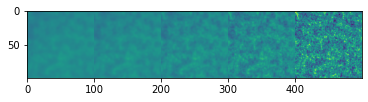

In [211]:
from matplotlib import pyplot as plt
plt.imshow(B[0,:,:])